In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from tqdm import tqdm

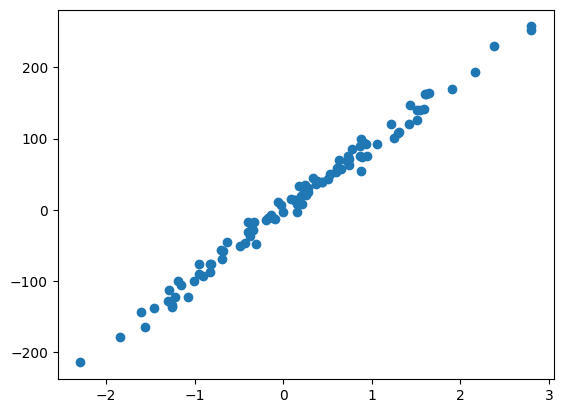

In [2]:
X , y = make_regression(n_samples = 100 , n_features = 1 , noise = 10)
plt.scatter(X , y)

In [5]:
print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


In [4]:
y = y.reshape(y.shape[0] , 1)

In [6]:
x = np.hstack((X , np.ones(X.shape)))

In [7]:
theta = np.random.randn(x.shape[1] , 1)
theta

array([[-0.4957215 ],
       [ 1.65692527]])

In [8]:
#Model
def model(x , theta):
    return x.dot(theta)

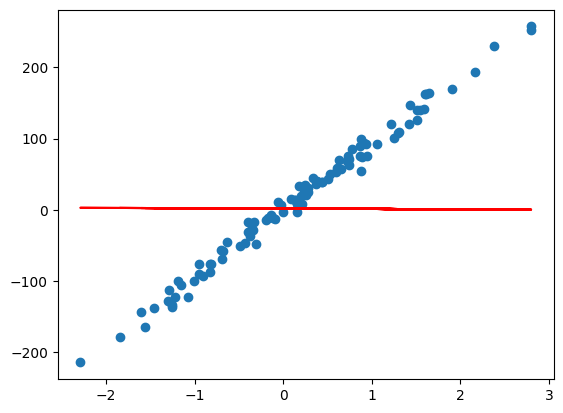

In [9]:
plt.scatter(X , y)
plt.plot(X , model(x , theta) , c = 'r')

In [10]:
#Fonction Cout
def cost(x , y , theta):
    m = len(y)
    return 1 / (2 * m) * np.sum((model(x , theta) - y)**2)

In [11]:
cost(x , y , theta)

4788.874954719806

In [12]:
def grad(x , y , theta):
    m = len(y)
    return 1 / m * x.T.dot(model(x , theta) - y)

In [13]:
def gradient(x , y , theta , learning_rate , n_iter):
    
    cost_history = np.zeros(n_iter)

    for i in tqdm(range(n_iter)):
        theta = theta - learning_rate * grad(x , y , theta)
        cost_history[i] = cost(x , y , theta)
    return theta , cost_history  

In [14]:
theta_f , cost_history = gradient(x , y , theta , learning_rate = 0.01 , n_iter = 1000)

100%|██████████| 1000/1000 [00:00<00:00, 19096.53it/s]


In [15]:
theta_f

array([[93.57670369],
       [-0.38131937]])

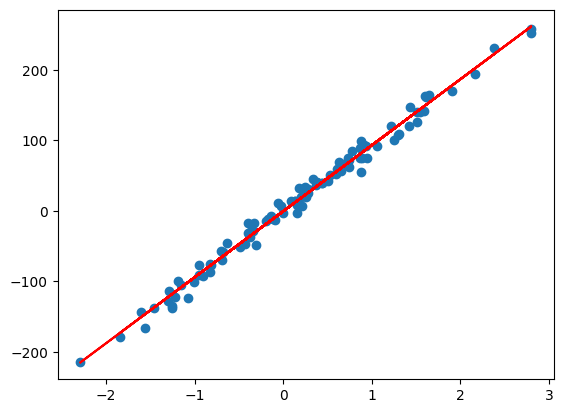

In [16]:
pred = model(x , theta_f)
plt.scatter(X , y)
plt.plot(X , pred , c = 'r') 

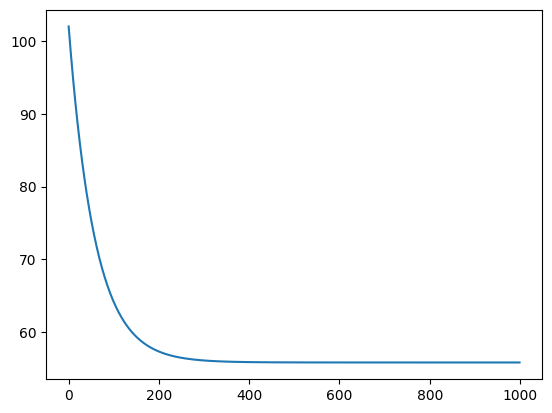

In [45]:
plt.plot(range(1000) , cost_history)

In [17]:
def coeff(y , pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - (u / v)

In [18]:
coeff(y , pred)

0.9897126593309162